In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import random
import copy
from collections import defaultdict
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.family'] = 'KBIZmjo M'
%matplotlib inline

In [2]:
train = pd.read_csv('Desktop/데이터분석/titanic/train.csv')
test = pd.read_csv('Desktop/데이터분석/titanic/test.csv')

In [3]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


----------------------------
# 데이터 타입 변환

In [7]:
#Name 칭호 분리 후 인덱스 부여 
train_set,test_set= set(),set()
for i,ind in zip(train['Name'], train.index):
    name_i = i.split(',')[1].split('.')[0].strip()
    train_set.add(name_i)
    train['Name'].iloc[ind:ind+1] =name_i
    
for i,ind in zip(test['Name'], test.index):
    name_i = i.split(',')[1].split('.')[0].strip()
    test_set.add(name_i)
    test['Name'].iloc[ind:ind+1] =name_i

In [8]:
train_set

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [9]:
test_set

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

------------
Dona는 Mrs와 같고

Don은 Mr와 같다는데 같이 분류해야하나...?

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.Name.describe()

count     891
unique     17
top        Mr
freq      517
Name: Name, dtype: object

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.Name.describe()

count     418
unique      9
top        Mr
freq      240
Name: Name, dtype: object

## 범주형 데이터 string -> int

In [14]:
object_col = ['Sex', 'Embarked','Name']
for c in object_col:
    train[c] = train[c].astype('category')
    test[c] = test[c].astype('category')
    
train['Sex'].cat.categories = [1,2]
test['Sex'].cat.categories = [1,2]
train['Embarked'].cat.categories = [1,2,3]
test['Embarked'].cat.categories = [1,2,3]
train['Name'].cat.categories = [i for i in range(1,len(train_set)+1)]
test['Name'].cat.categories= [i for i in range(1,len(test_set)+1)]

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


In [16]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,12,2,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,13,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,9,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,13,1,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,12,2,35.0,0,0,373450,8.0500,NaN,3


In [17]:
train.info() #Ticket과 Cabin은 활용하지 않을 것같아서 일단 보류

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


------------------
# Age 결측치 처리

In [18]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 해당 행만 삭제


In [19]:
train_del = train.drop(train.loc[train.Age.isnull()].index) 
train_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
train_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## mean

In [21]:
train_mean = copy.deepcopy(train)
train_mean['Age'].fillna(train_mean.Age.mean(), inplace = True)

In [22]:
train_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
test_mean = copy.deepcopy(test)
test_mean['Age'].fillna(test_mean.Age.mean(), inplace = True)

## median

In [24]:
train_median = copy.deepcopy(train)
train_median['Age'].fillna(train_median.Age.median(), inplace = True)

In [25]:
train_median.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
test_median = copy.deepcopy(test)
test_median['Age'].fillna(test_median.Age.median(), inplace = True)

----------------------
# Cabin 결측치 처리

## 컬럼 삭제

In [27]:
train.drop('Cabin', axis= 1,inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 59.3+ KB


In [28]:
train_del.drop('Cabin', axis= 1 , inplace = True)
train_mean.drop('Cabin', axis= 1 , inplace = True)
train_median.drop('Cabin', axis= 1 , inplace = True)

-----------------
# 나머지 결측치 처리(Age, Cabin 제외)

In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [30]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## train의 Embarked  -  최빈값으로 채우기

In [31]:
train.Embarked.describe()

count     889
unique      3
top         3
freq      644
Name: Embarked, dtype: int64

In [32]:
train.Embarked.fillna(3, inplace = True)

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## test의 Fare  -  mean으로 채우기

In [34]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [35]:
test.Fare.fillna(test.Fare.mean(), inplace = True)

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

-----------------------
# 새로운 컬럼 추가

In [37]:
train['Family'] = train['SibSp'] + train['Parch']

In [38]:
train_mean['Family'] = train['SibSp'] + train['Parch']
train_median['Family'] = train['SibSp'] + train['Parch']
train_del['Family'] = train['SibSp'] + train['Parch']

test_mean['Family'] = test['SibSp'] + test['Parch']
test_median['Family'] = test['SibSp'] + test['Parch']



In [39]:
test['Family'] =  test['SibSp']+train['Parch']


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
Family         891 non-null int64
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 66.3+ KB


--------------------------------------
## 정리

- feature로 선택 가능한 것은, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked


- Sex, Embarked는 [1,2], [1,2,3]으로 카테고리화


- Name은 칭호 분리 후 인덱싱


- Age 결측치 처리 방식에 따라 학습 데이터와 테스트 데이터 구분
    
    - del
    - mean
    - median


- 나머지 결측치는 양이 많지 않아서 모두 평균 또는 빈도수(범주형)가 많은 것으로 대체


- SibSp와 Parch를 더한 값인 Family 컬럼 추가

# 피처 선택

In [41]:
tmp_feature = ['Pclass', 'Age', 'Fare','SibSp','Parch','Family']

In [42]:
train[tmp_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Age       714 non-null float64
Fare      891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Family    891 non-null int64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


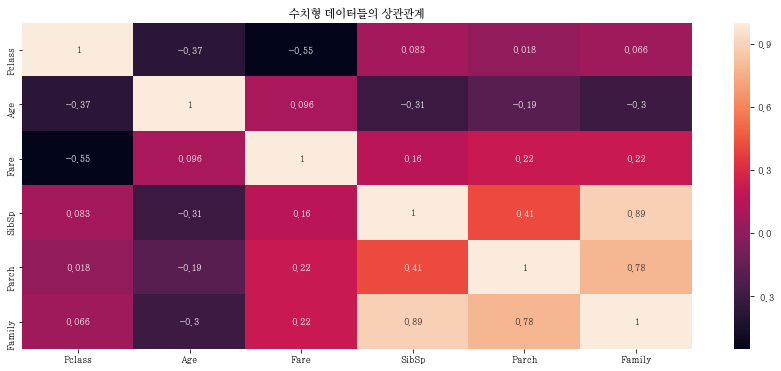

In [43]:
#표준화+상관관계분석
import scipy.stats as ss
plt.figure(figsize = (15,6))
plt.title('수치형 데이터들의 상관관계')
sns.heatmap(train[tmp_feature].corr(),annot = True)
plt.show()

-------------------
0.7 ~ 1.0 : 강한 양적 상관관계

0.3 ~ 0.7 : 뚜렷한 양적 상관관계

0.1 ~ 0.3 : 약한 양적 상관관계

-0.1 ~ 0.1 : 상관관계 거의 없음

-0.3 ~ -0.1 : 약한 음적 상관관계

-0.7 ~ -0.3 : 뚜렷한 음적 상관관계

-1.0 ~ -0.7 : 강한 음적 상관관계


위 기준에 따르면, 

Pclass와 Age -> 뚜렷한 음적 상관관계

Fare와 Pclass -> 뚜렷한 음적 상관관계

SibSp와 Parch -> 뚜렷한 양적 상관관계

SibSp와 Age -> 뚜렷한 음적 상관관계

Family와 Age -> 뚜렷한 음적 상관관계

Family와 SibSp,Parch -> 강한 양적 상관관계

로 해석할 수 있을 것 같다. 



<br><br>
*train_mean 또는 train_median에 적용하면 상관관계가 더 낮아짐*

## SibSp, Parch -> Family로 대체

Family와 SibSp, Parch는 강한 양적 상관관계를 보이고 다른 컬럼들과 상관관계도 큰 차이가 없으므로

SibSp,Parch를 Family로 대체해도 된다고 생각한다.


In [44]:
train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,12,2,22.0,A/5 21171,7.2500,3,1
1,2,1,1,13,1,38.0,PC 17599,71.2833,1,1
2,3,1,3,9,1,26.0,STON/O2. 3101282,7.9250,3,0
3,4,1,1,13,1,35.0,113803,53.1000,3,1
4,5,0,3,12,2,35.0,373450,8.0500,3,0


In [45]:
train_del.drop(['SibSp', 'Parch'],axis = 1, inplace = True)
train_mean.drop(['SibSp', 'Parch'],axis = 1, inplace = True)
train_median.drop(['SibSp', 'Parch'],axis = 1, inplace = True)

In [46]:
train_mean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,12,2,22.0,A/5 21171,7.2500,3,1
1,2,1,1,13,1,38.0,PC 17599,71.2833,1,1
2,3,1,3,9,1,26.0,STON/O2. 3101282,7.9250,3,0
3,4,1,1,13,1,35.0,113803,53.1000,3,1
4,5,0,3,12,2,35.0,373450,8.0500,3,0


In [97]:
#피처 선택
feature = ['Pclass','Name', 'Sex', 'Age','Family']
feature_no_age = ['Pclass','Name', 'Sex', 'Family']

# 모델 적용 및 평가

## Recall  vs  Precision

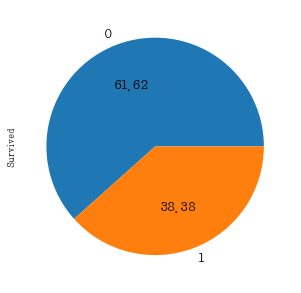

In [48]:
train.Survived.value_counts().plot.pie(figsize = (5,5),autopct = '%.2f',fontsize=15)
plt.show()

---------------------
train데이터는 사망자(False)가 61.62%를 차지하므로,

False Negatives 즉, 생존자를 사망자로 분류하는 것을 줄여야한다.

따라서 <strong>Recall이 더 중요한 평가지표</strong>이다.

<br><br>
## PR곡선 vs ROC곡선

In [49]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family'],
      dtype='object')

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

#model 적용 및 평가
def model_result(feature, x, model):
    x_train, x_test, y_train, y_test = train_test_split(x[feature], x['Survived'], test_size = 0.3)
    model.fit(x_train, y_train)
    print(confusion_matrix(model.predict(x_test), y_test),'\n\n')
    print(classification_report(model.predict(x_test), y_test))
    y_pred_proba = model.predict_proba(x_test)[::,1]
    #ROC곡선과 AUC
    fp,tp, thres = roc_curve(y_test,y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    print('\nAUC=',auc)
    plt.plot(fp,tp)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
#     #PR곡선
#     precision,recall,thres = precision_recall_curve(y_test,y_pred_proba)
#     tmp_n =min(precision.shape[0], recall.shape[0], thres.shape[0])
#     plt.plot(thres, precision[:tmp_n], "b--", label='precision')
#     plt.plot(thres, recall[:tmp_n], "g-", label='recall')
#     plt.ylim([0, 1])
#     plt.xlabel("threshold")
#     plt.legend()
    plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

[[118  16]
 [ 21  60]] 


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       134
           1       0.79      0.74      0.76        81

   micro avg       0.83      0.83      0.83       215
   macro avg       0.82      0.81      0.81       215
weighted avg       0.83      0.83      0.83       215


AUC= 0.8694623248769405


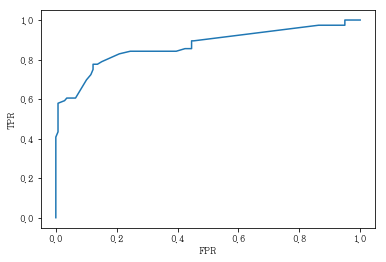

In [52]:
model_result(feature, train_del, log_clf)

[[159  24]
 [ 17  68]] 


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       183
           1       0.74      0.80      0.77        85

   micro avg       0.85      0.85      0.85       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268


AUC= 0.8458189229249011


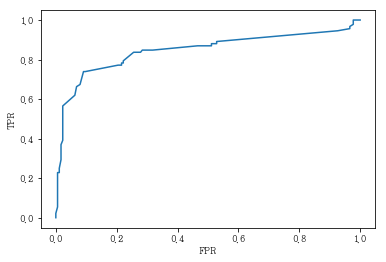

In [53]:
model_result(feature,train_median, log_clf)

[[145  40]
 [ 15  68]] 


              precision    recall  f1-score   support

           0       0.91      0.78      0.84       185
           1       0.63      0.82      0.71        83

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.80      0.78       268
weighted avg       0.82      0.79      0.80       268


AUC= 0.8118055555555556


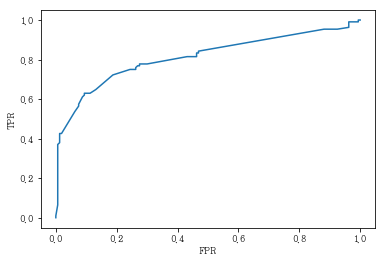

In [54]:
model_result(feature,train_mean, log_clf)

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()

[[123  60]
 [  7  25]] 


              precision    recall  f1-score   support

           0       0.95      0.67      0.79       183
           1       0.29      0.78      0.43        32

   micro avg       0.69      0.69      0.69       215
   macro avg       0.62      0.73      0.61       215
weighted avg       0.85      0.69      0.73       215


AUC= 0.7214479638009049


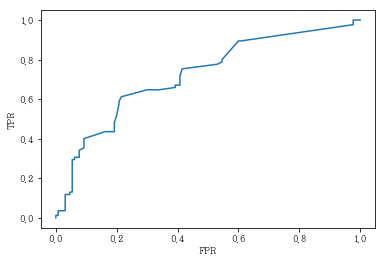

In [56]:
model_result(feature,train_del, nb_clf)

[[170  84]
 [  3  11]] 


              precision    recall  f1-score   support

           0       0.98      0.67      0.80       254
           1       0.12      0.79      0.20        14

   micro avg       0.68      0.68      0.68       268
   macro avg       0.55      0.73      0.50       268
weighted avg       0.94      0.68      0.77       268


AUC= 0.7537572254335261


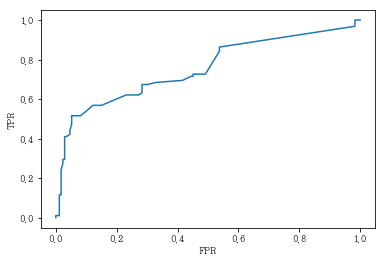

In [57]:
model_result(feature,train_median, nb_clf)

[[142 103]
 [ 15   8]] 


              precision    recall  f1-score   support

           0       0.90      0.58      0.71       245
           1       0.07      0.35      0.12        23

   micro avg       0.56      0.56      0.56       268
   macro avg       0.49      0.46      0.41       268
weighted avg       0.83      0.56      0.66       268


AUC= 0.6937797670281746


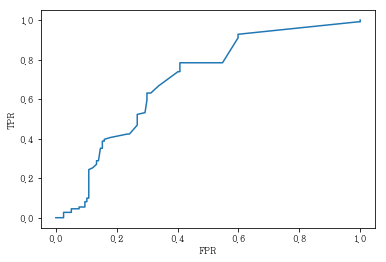

In [58]:
model_result(feature,train_mean, nb_clf)

-----------
위 나이브베이즈 모델은 Recall, AUC값을 보았을 때 성능이 좋지 않은것으로 보인다.

In [59]:
from sklearn import svm
svm_clf = svm.SVC(probability = True)

[[117  28]
 [ 13  57]] 


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       145
           1       0.67      0.81      0.74        70

   micro avg       0.81      0.81      0.81       215
   macro avg       0.79      0.81      0.79       215
weighted avg       0.83      0.81      0.81       215


AUC= 0.8363800904977376


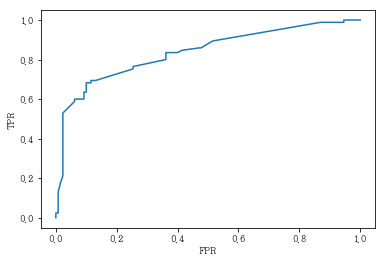

In [60]:
model_result(feature,train_del, svm_clf)

[[139  32]
 [ 21  76]] 


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       171
           1       0.70      0.78      0.74        97

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.80      0.80       268


AUC= 0.8249710648148147


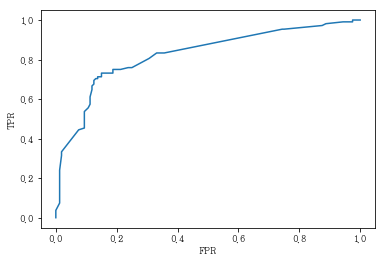

In [61]:
model_result(feature,train_median, svm_clf)

[[154  23]
 [ 19  72]] 


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       177
           1       0.76      0.79      0.77        91

   micro avg       0.84      0.84      0.84       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.85      0.84      0.84       268


AUC= 0.848950410708853


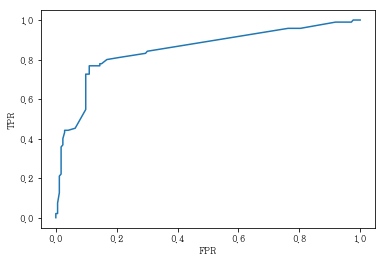

In [62]:
model_result(feature,train_mean, svm_clf)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

[[122  26]
 [ 10  57]] 


              precision    recall  f1-score   support

           0       0.92      0.82      0.87       148
           1       0.69      0.85      0.76        67

   micro avg       0.83      0.83      0.83       215
   macro avg       0.81      0.84      0.82       215
weighted avg       0.85      0.83      0.84       215


AUC= 0.8865005476451259


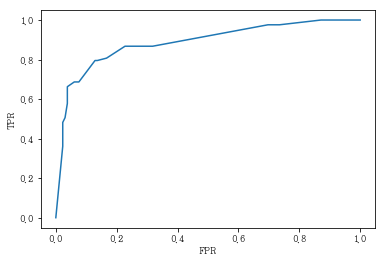

In [64]:
model_result(feature,train_del, dt_clf)

[[157  27]
 [ 18  66]] 


              precision    recall  f1-score   support

           0       0.90      0.85      0.87       184
           1       0.71      0.79      0.75        84

   micro avg       0.83      0.83      0.83       268
   macro avg       0.80      0.82      0.81       268
weighted avg       0.84      0.83      0.83       268


AUC= 0.8723502304147466


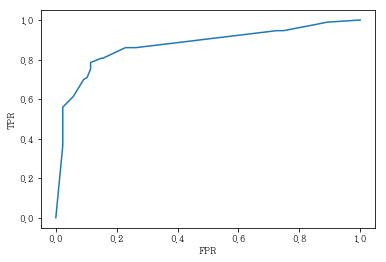

In [65]:
model_result(feature,train_median, dt_clf)

[[139  30]
 [ 21  78]] 


              precision    recall  f1-score   support

           0       0.87      0.82      0.84       169
           1       0.72      0.79      0.75        99

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.81      0.81      0.81       268


AUC= 0.8615162037037036


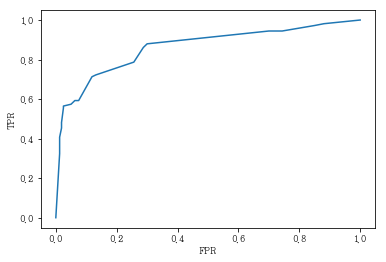

In [66]:
model_result(feature,train_mean, dt_clf)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

[[103  27]
 [ 16  69]] 


              precision    recall  f1-score   support

           0       0.87      0.79      0.83       130
           1       0.72      0.81      0.76        85

   micro avg       0.80      0.80      0.80       215
   macro avg       0.79      0.80      0.79       215
weighted avg       0.81      0.80      0.80       215


AUC= 0.8746498599439776


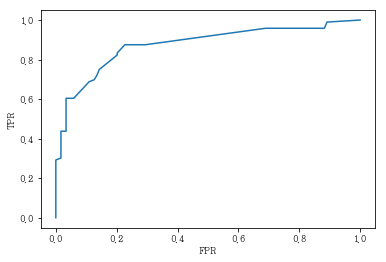

In [68]:
model_result(feature,train_del, rf_clf)

[[144  29]
 [ 27  68]] 


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       173
           1       0.70      0.72      0.71        95

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268


AUC= 0.844305781636221


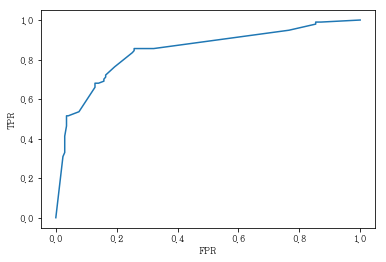

In [69]:
model_result(feature,train_median, rf_clf)

[[146  29]
 [ 18  75]] 


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       175
           1       0.72      0.81      0.76        93

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268


AUC= 0.8666744840525328


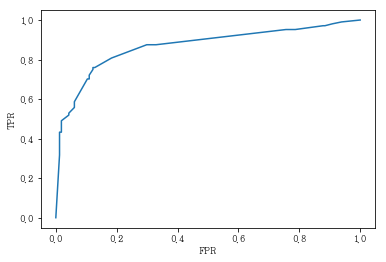

In [70]:
model_result(feature,train_mean, rf_clf)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

[[104  20]
 [ 20  71]] 


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       124
           1       0.78      0.78      0.78        91

   micro avg       0.81      0.81      0.81       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.81      0.81      0.81       215


AUC= 0.8847926267281107


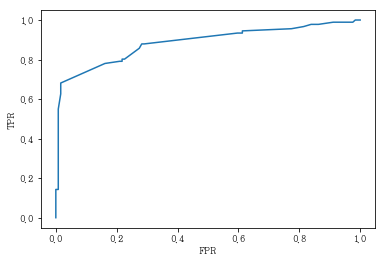

In [72]:
model_result(feature,train_del, gb_clf)

[[147  29]
 [ 23  69]] 


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       176
           1       0.70      0.75      0.73        92

   micro avg       0.81      0.81      0.81       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268


AUC= 0.8663565426170468


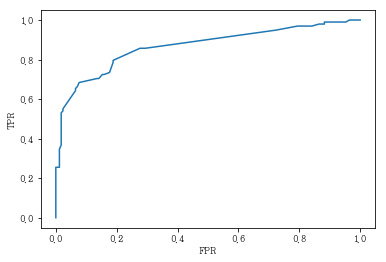

In [73]:
model_result(feature,train_median, gb_clf)

[[134  29]
 [ 29  76]] 


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       163
           1       0.72      0.72      0.72       105

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268


AUC= 0.8456324861232837


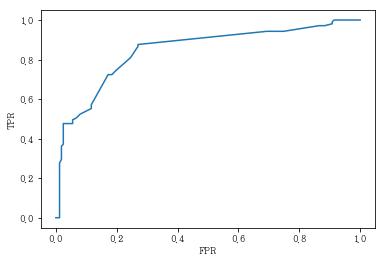

In [74]:
model_result(feature,train_mean, gb_clf)

# 최종 결과

In [102]:
feature

['Pclass', 'Name', 'Sex', 'Age', 'Family']

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
Family         891 non-null int64
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 52.4+ KB


In [ ]:
feature2= ['Pclass','Name', 'Sex','Age','Embarked','Family']

In [109]:
model = gb_clf
x_train = train_median[feature]
model.fit(x_train, train_median['Survived'])
y_test = model.predict(test_median[feature])

In [110]:
submission = pd.read_csv('Desktop/데이터분석/titanic/gender_submission.csv')
submission['Survived']= y_test
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [111]:
submission.to_csv('Desktop/데이터분석/titanic/submission_gb_median2.csv',index =  False)

-----------
<각 모델별 최고 조합 및 점수>
- Gradient Boost : train_del, feature_no_age (0.775)
- Random Forest : train_mean, feature_no_age (0.737)
- Logistic Regression : All (0.770)
- Decision Tree : train_median, train_mean (0.761)
- SVM, Naive Bayes : 모두 0.7 미만